## Pyber 2016 Ride Share Analysis

- The spread of the average fare cost is greater in rural areas then compared to suburban and urban areas. With the exception of a few outliers in the rural areas, rural and suburban riders pay similar fares. The minimum of the average fare cost is roughly 28% higher in rural areas than that of the minimum average fare cost in urban areas.

- Rural riders are likely traveling longer distances compared to suburban and urban riders reducing the amount of rider turnover rural drivers can achieve.

- While the majority of fare dollars is made in urban city types, rural riders are paying higer fares than those in urban city types. However the volume of rural rides is minimal in comparision to it's city type counterparts.

- Suburban riders are paying fares least as much as the more expensive urban fares. Though urban areas lead in the total number of rides, there is a an overlap between the count of urban city rides and suburban city rides.

- Drivers in suburban areas make up 16.5% of total drivers, however they generate 30% of the total fare dollars. Suburban areas have greater effiency in a dollar per driver comparison.

- Based on the above we should consider devloping a strategy to increase marekt share and the number of drivers in the suburban city types.

In [38]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset

complete_df = pd.merge(ride_df, city_df, how="left", on="city")

# Display the data table for preview

complete_df.head()





,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


 ### Bubble Plot of Ride Sharing Data

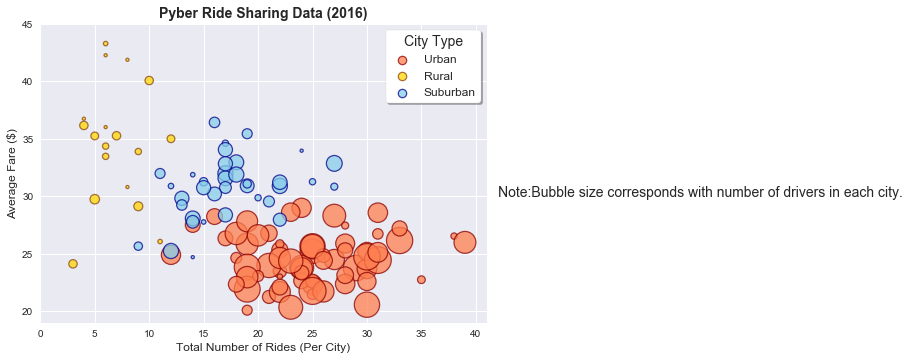

In [79]:

#Calculate number of rides per city for each city type
urban_rides = complete_df.loc[complete_df["type"] == "Urban"].groupby("city")["ride_id"].count()
rural_rides = complete_df.loc[complete_df["type"] == "Rural"].groupby("city")["ride_id"].count()
suburban_rides = complete_df.loc[complete_df["type"] == "Suburban"].groupby("city")["ride_id"].count()

#calculate average fare per city for each city type
urban_fare = complete_df.loc[complete_df["type"] == "Urban"].groupby("city")["fare"].mean()
rural_fare = complete_df.loc[complete_df["type"] == "Rural"].groupby("city")["fare"].mean()   
suburban_fare = complete_df.loc[complete_df["type"] == "Suburban"].groupby("city")["fare"].mean()

#calculate number of drivers per city for each city type
urban_drivers = complete_df.loc[complete_df["type"] == "Urban"].groupby("city")["driver_count"].mean()
rural_drivers = complete_df.loc[complete_df["type"] == "Rural"].groupby("city")["driver_count"].mean()
suburban_drivers = complete_df.loc[complete_df["type"] == "Suburban"].groupby("city")["driver_count"].mean()

#experimenting with different style sheets
plt.style.use('seaborn')

#create scatter plots for each city type displaying number of rides per city on x-axis and average fare on y-axis
urban_scatter = plt.scatter(urban_rides, urban_fare, s=urban_drivers*10, marker="o", c="coral", edgecolors="darkred",
                           linewidth=1.25, alpha=.75, label="Urban")

rural_scatter = plt.scatter(rural_rides, rural_fare, s=rural_drivers*10, marker="o", c="gold", edgecolors="saddlebrown",
                           linewidth=1.25,alpha=.75, label="Rural")

suburban_scatter = plt.scatter(suburban_rides, suburban_fare, s=suburban_drivers*10, marker="o", c="skyblue", 
                               linewidth=1.25,edgecolors="darkblue", alpha=.75, label="Suburban")

#set x and y axis limits
plt.xlim(0,41)
plt.ylim(19,45)

#label axis, set a title and format plot elements
plt.title ("Pyber Ride Sharing Data (2016)", fontsize=14, fontweight="bold" )
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.grid(color="white")

#add note outside of plot area
text_label= "Note:Bubble size corresponds with number of drivers in each city."
plt.text(42, 30, text_label, fontsize=14)

#create and format legend
legend = plt.legend(title="City Type", title_fontsize=14, fancybox=True, frameon=True, shadow=True, facecolor="white",
                   fontsize=12)

#set legend marker handles as equal size
legend.legendHandles[0]._sizes = [70]
legend.legendHandles[1]._sizes = [70]
legend.legendHandles[2]._sizes = [70]

#save plot as separate file
plt.savefig("pyber_ride_sharing_data_2016")

#display plot 
plt.show()





## Total Fares by City Type

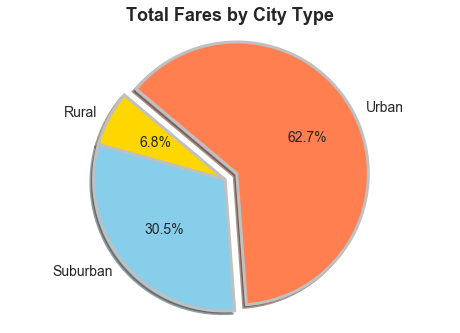

In [105]:

#calculate total fare percentage by city type
total_fare = complete_df["fare"].sum()
fare_type_total = complete_df.groupby("type")["fare"].sum()
fare_type_pct = (fare_type_total / total_fare)*100

#create pie chart with labels and formating
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "skyblue", "coral"]
explode = [0,0,.1]
plt.pie(fare_type_pct, explode=explode, labels=labels, colors=colors,
       autopct="%1.1f%%", shadow=True, textprops={'fontsize': 14}, startangle=140, wedgeprops = {'linewidth': 3,
       "edgecolor" : "silver"})

#set plot axis so that plot displays as circle
plt.axis("equal")

#create plot title and format
plt.title ("Total Fares by City Type", fontsize=18, fontweight="bold" )

#save plot as local file
plt.savefig("total_fares_by_city_type")

#display plot 
plt.show()








## Total Rides by City Type

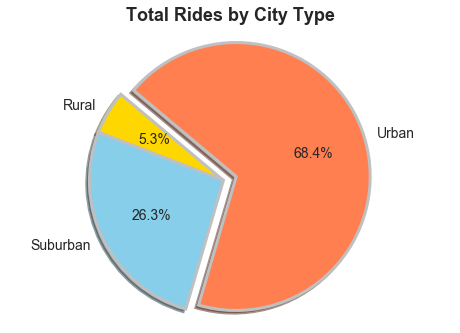

In [104]:
#calculate total ride percentage by city type
total_ride = complete_df["ride_id"].count()
ride_type_count = complete_df.groupby("type")["ride_id"].count()
ride_type_pct = (ride_type_count / total_ride)*100

#create pie chart with labels and formatting
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "skyblue", "coral"]
explode = [0,0,.1]
plt.pie(ride_type_pct, explode=explode, labels=labels, colors=colors,
       autopct="%1.1f%%",textprops={'fontsize': 14}, shadow=True, startangle=140, wedgeprops = {'linewidth': 3,
        "edgecolor" : "silver"})

#set axis so the pie chart displays as more circular
plt.axis("equal")

#create title with formatting
plt.title ("Total Rides by City Type", fontsize=18, fontweight="bold" )

#save pie chart  locally
plt.savefig("total_rides_by_city_type")

#display chart
plt.show()



## Total Drivers by City Type

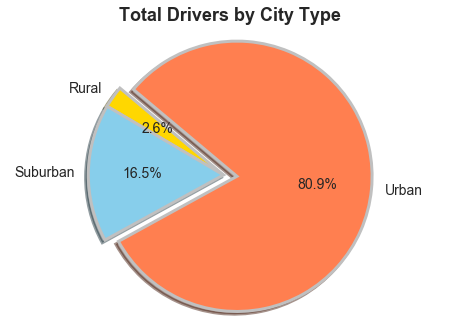

In [103]:

#calculate percentage of total drives by city type
total_drivers = city_df["driver_count"].sum()
driver_type_count = city_df.groupby("type")["driver_count"].sum()
driver_type_pct = (driver_type_count / total_drivers)*100

#create pie chart with labels and formatting
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "skyblue", "coral"]
explode = [0,0,.1]
plt.pie(driver_type_pct, explode=explode, labels=labels, colors=colors,
       autopct="%1.1f%%", textprops={'fontsize': 14}, shadow=True, startangle=140, wedgeprops = {'linewidth': 3,
       "edgecolor" : "silver"})


plt.axis("equal")

plt.title ("Total Drivers by City Type", fontsize=18, fontweight="bold" )


plt.savefig("total_drivers_by_city_type")

plt.show()

